## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame()

In [3]:
df = pd.read_csv("LoanStatus.csv")

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [42]:
# calculates the mean and standard deviation of the 'ApplicantIncome' column separately for males and females
filt_m = df['Gender'] == 'Male'
filt_f = df['Gender'] == 'Female'
m_mean = df[filt_m]['ApplicantIncome'].mean()
f_mean = df[filt_f]['ApplicantIncome'].mean()
m_std = df[filt_m]['ApplicantIncome'].std()
f_std = df[filt_f]['ApplicantIncome'].std()

In [51]:
# sums the number of blank values in each column of the dataframe
blank = df.isnull().sum()
blank

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [52]:
#calculates the probability of an approved loan
filt_ls = df['Loan_Status'] == 'Y'
y_status = df[filt_ls]['Loan_Status'].count()
total = df['Loan_Status'].count()
p = y_status/total

In [53]:
#result
p

0.6872964169381107

In [54]:
# calculate the probability of getting a loan when the client has a good credit history
filt_ch = df['Credit_History'] == 1.0
total_good = df[filt_ch]['Credit_History'].count()
filt_ch_app = (df['Loan_Status'] == 'Y') & (df['Credit_History'] == 1.0)
num = df[filt_ch_app]['Credit_History'].count()
p2 = num / total_good

In [55]:
p2 #result

0.7957894736842105

## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

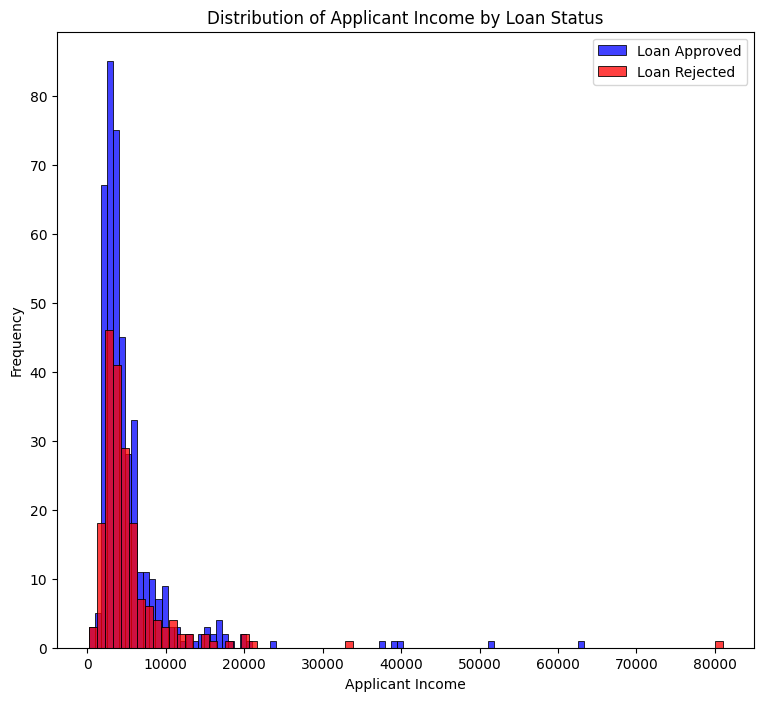

In [58]:
# a histogram to visualize the distribution of applicant income by loan status ('Y' for approved and 'N' for rejected) using seaborn
plt.figure(figsize=(9, 8))
sns.histplot(df[df['Loan_Status'] == 'Y']['ApplicantIncome'].dropna(), kde=False, color='blue', label='Loan Approved')
sns.histplot(df[df['Loan_Status'] == 'N']['ApplicantIncome'].dropna(), kde=False, color='red', label='Loan Rejected')
plt.title("Distribution of Applicant Income by Loan Status")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.legend()
warnings.filterwarnings("ignore")
plt.show()

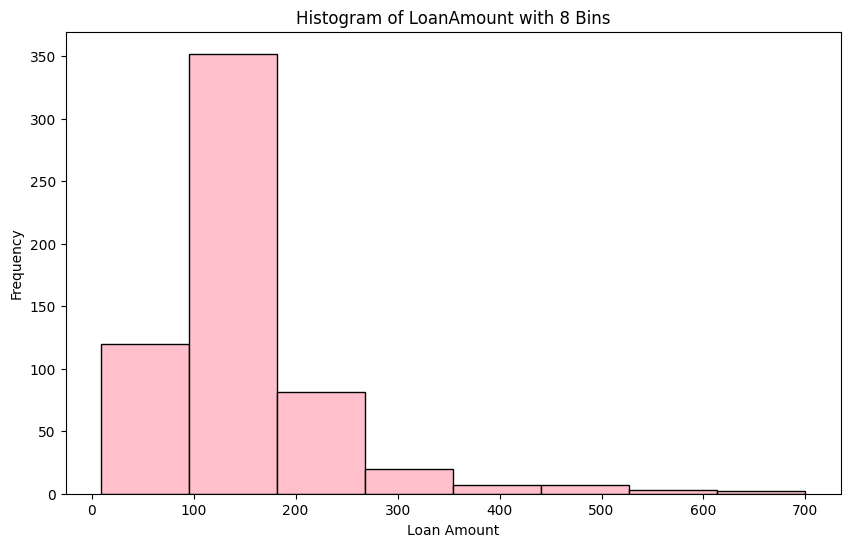

In [59]:
# a histogram to visualize the distribution of loan amounts using matplotlib. 
column_name = 'LoanAmount'
num_bins = 8
plt.figure(figsize=(10, 6))
plt.hist(df[column_name].dropna(), bins=num_bins, color = ["pink"], edgecolor='black')  
plt.title(f"Histogram of {column_name} with {num_bins} Bins")  
plt.xlabel("Loan Amount") 
plt.ylabel("Frequency") 
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [60]:
from scipy.stats import norm

In [61]:
# calculates the cumulative distribution function (CDF) value for a salary value of 2000 using the normal distribution
# with the mean and standard deviation of the 'ApplicantIncome' column
salary_x = 2000
salary_mean = df['ApplicantIncome'].mean()
salary_std_dev = df['ApplicantIncome'].std()
salary_p = norm.cdf(salary_x, salary_mean, salary_std_dev)

In [62]:
salary_p #result

0.28872328177095585

## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

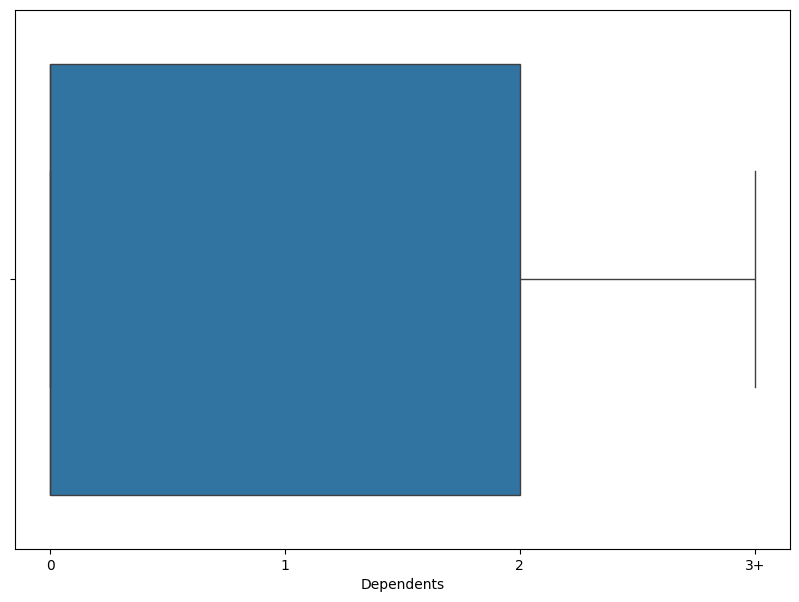

In [65]:
#creates a boxplot of the 'Dependents' column using seaborn
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x = df['Dependents'])
plt.show()

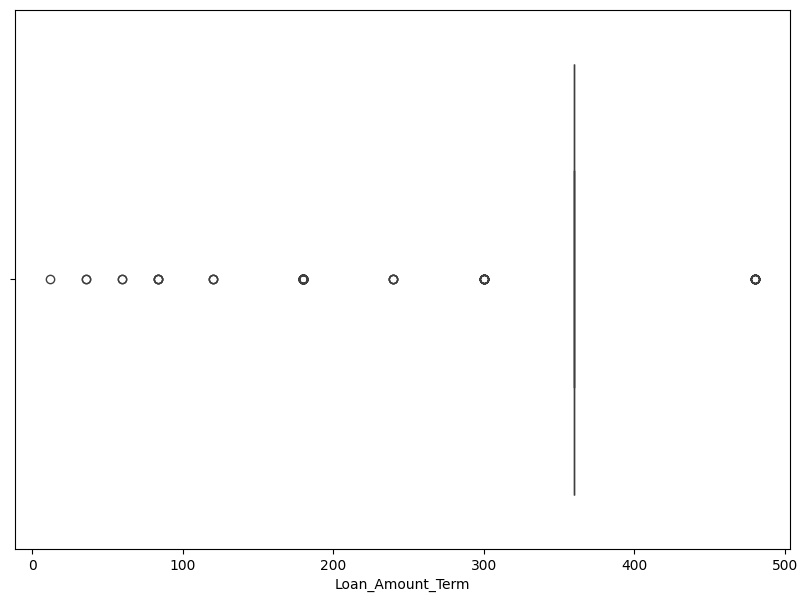

In [69]:
# creates a boxplot of the 'Loan_Amount_Term' column using seaborn
fig = plt.figure(figsize =(10, 7))
sns.boxplot(data=df, x='Loan_Amount_Term')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [70]:
from scipy.stats import ttest_1samp,ttest_ind

In [36]:
# calculates the mean and standard deviation of applicant income column
income = df['ApplicantIncome'].mean(), np.std(df['ApplicantIncome'],ddof = 1)

In [34]:
# a one-sample t-test is conducted to test whether the mean of the 'ApplicantIncome' column is significantly different from 0.8
t_statistic, p_value = ttest_1samp(df['ApplicantIncome'], 0.8)
t_statistic

21.913849649573187

In [71]:
p_value  #probability of observing the data if the null hypothesis were true

0.1862458823522394

In [72]:
filt_m = df['Gender'] == 'Male'
filt_f = df['Gender'] == 'Female'

In [74]:
# using the first task for the two sample t-test
m_count = df[filt_m]['Gender'].value_counts()['Male']
f_count = df[filt_f]['Gender'].value_counts()['Female']
total = df['Gender'].count()
print("male:", m_count)
print("female:", f_count)
print("total:", total)

male: 489
female: 112
total: 601


In [46]:
m_mean = df[filt_m]['ApplicantIncome'].mean()
f_mean = df[filt_f]['ApplicantIncome'].mean()
m_mean, f_mean

(5446.460122699386, 4643.473214285715)

In [47]:
m_std = df[filt_m]['ApplicantIncome'].std()
f_std = df[filt_f]['ApplicantIncome'].std()

In [48]:
# two-sample t-test to compare the means of 'ApplicantIncome' between male and female applicants in the dataframe
t_statistic, p_value = ttest_ind(df[filt_m]['ApplicantIncome'], df[filt_f]['ApplicantIncome'])

In [49]:
t_statistic

1.3232838129163134

In [50]:
p_value

0.1862458823522394